# Data Exploration

In this notebook describe your data exploration steps.

## Install dependencies

In [54]:
%pip install pandas==2.0.0
%pip install SQLAlchemy==1.4.46
%pip install Matplotlib==3.7
%pip install openpyxl==3.0.10

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     ---------------------------------------- 0.0/242.1 kB ? eta -:--:--
     - -------------------------------------- 10.2/242.1 kB ? eta -:--:--
     ---- -------------------------------- 30.7/242.1 kB 435.7 kB/s eta 0:00:01
     --------------------------- ---------- 174.1/242.1 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 242.1/242.1 kB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


## Load data

In [35]:
import pandas as pd
import numpy as np

#Link of datasourse 1
datasource1_link = 'https://www.landesdatenbank.nrw.de/ldbnrwws/downloader/00/tables/46251-02iz_00.csv'
#I want to start reading lines from 8 row.
lines_to_skip = list(range(1, 8))
lines_to_read = 61 # Number of lines to read

# Read the specified lines from the CSV file into a DataFrame
df = pd.read_csv(datasource1_link, skiprows=lines_to_skip, nrows=lines_to_read, delimiter=';', encoding='latin1')
df.reset_index(inplace=True)
#Rename columns
df.columns = ['PC','Province','Vehicles', 'Cars', 'Trucks', 'Tractors', 'Motorcycles']
#Delete row with missing information
df = df[df['Vehicles'] != "-"]
#Set column type
dtype_mapping = {
    'PC': str, 
    'Province': str,  
    'Vehicles': int,
    'Cars': int,
    'Trucks': int,
    'Tractors': int,
    'Motorcycles': int,  
}

df = df.astype(dtype_mapping)

### Look at the first rows

In [38]:
df.head()

,PC,Province,Vehicles,Cars,Trucks,Tractors,Motorcycles
0,5,Nordrhein-Westfalen,8388438,7441319,327226,210300,315080
1,51,"Düsseldorf, Regierungsbezirk",2491707,2235775,101475,35041,92818
2,5111,"Düsseldorf, krfr. Stadt",284879,256909,12557,1382,10902
3,5112,"Duisburg, krfr. Stadt",225118,203936,8724,1732,8413
4,5113,"Essen, krfr. Stadt",282073,255571,11309,1300,10646


### Data exploration


In [40]:
df.info()

df['Province'].unique()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 0 to 60
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PC           60 non-null     object
 1   Province     60 non-null     object
 2   Vehicles     60 non-null     int32 
 3   Cars         60 non-null     int32 
 4   Trucks       60 non-null     int32 
 5   Tractors     60 non-null     int32 
 6   Motorcycles  60 non-null     int32 
dtypes: int32(5), object(2)
memory usage: 2.6+ KB


array(['Nordrhein-Westfalen', '  Düsseldorf, Regierungsbezirk',
       '    Düsseldorf, krfr. Stadt', '    Duisburg, krfr. Stadt',
       '    Essen, krfr. Stadt', '    Krefeld, krfr. Stadt',
       '    Mönchengladbach, krfr. Stadt',
       '    Mülheim an der Ruhr, krfr. Stadt',
       '    Oberhausen, krfr. Stadt', '    Remscheid, krfr. Stadt',
       '    Solingen, krfr. Stadt', '    Wuppertal, krfr. Stadt',
       '    Kleve, Kreis', '    Mettmann, Kreis', '    Rhein-Kreis Neuss',
       '    Viersen, Kreis', '    Wesel, Kreis',
       '  Köln, Regierungsbezirk', '    Aachen, krfr. Stadt',
       '    Bonn, krfr. Stadt', '    Köln, krfr. Stadt',
       '    Leverkusen, krfr. Stadt', '    Aachen, Kreis',
       '    Düren, Kreis', '    Rhein-Erft-Kreis',
       '    Euskirchen, Kreis', '    Heinsberg, Kreis',
       '    Oberbergischer Kreis', '    Rheinisch-Bergischer Kreis',
       '    Rhein-Sieg-Kreis', '  Münster, Regierungsbezirk',
       '    Bottrop, krfr. Stadt', '    Gels

In [46]:
# Vehicles per Region
df1 = df[df['PC'].isin(['51','53','55','57','59'])]
df1

,PC,Province,Vehicles,Cars,Trucks,Tractors,Motorcycles
1,51,"Düsseldorf, Regierungsbezirk",2491707,2235775,101475,35041,92818
17,53,"Köln, Regierungsbezirk",1973841,1754659,76071,41597,78052
31,55,"Münster, Regierungsbezirk",1176767,1032375,43538,47140,41104
40,57,"Detmold, Regierungsbezirk",989355,854459,40981,48264,34555
48,59,"Arnsberg, Regierungsbezirk",1756768,1564051,65161,38258,68551


<Axes: xlabel='Province'>

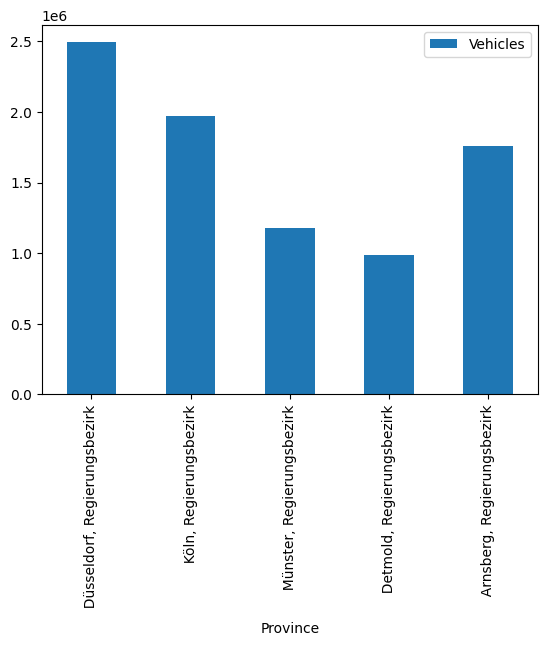

In [51]:
# Plot vehicles per Region
df1.plot.bar(x='Province', y='Vehicles')

Load Data for second dataset

In [90]:
#Link of datasourse 2
datasource2_link = 'https://www.opengeodata.nrw.de/produkte/umwelt_klima/luftqualitaet/luqs/eu_jahreskenngroessen/LUQS-EU-Kenngroessen-2022.xlsx'
#Get the excel file uploaded on python
xls = pd.ExcelFile(datasource2_link)
#The excel file has 2 sheets, I selected the sheet where the information is.
df2 = pd.read_excel(xls, 'EU-Jahreskenngrößen 2022')

In [91]:
#Declare the columns name
columns_name = [
    'Name','Kennung', 'Gebiets-Name', 'Klassifikation', 'EU-Code',
    'Stickstoffdioxid Zeitl. Überdeckung  %', 'Stickstoffdioxid Jahresmittel µg/m³', 
    'Stickstoffdioxid Max. 1h-Wert', 'Stickstoffdioxid # 1h-Werte  > 200 µg/m³', 
    'Stickstoffdioxid Mess- verfahren', 'PM10 Zeitl. Überdeckung  %',
    'PM10 Jahresmittel µg/m³', 'PM10 # Tagesmittel > 50 µg/m³', 'PM10 Mess- verfahren',
    'PM2,5 Zeitl. Überdeckung  %', 'PM2,5 Jahresmittel µg/m³', 'PM2,5 Mess- verfahren',
    'Schwefeldioxid Zeitl. Überdeckung  %', 'Schwefeldioxid Jahresmittel µg/m³', 
    'Schwefeldioxid Max. 1h-Wert','Schwefeldioxid # 1h-Werte  > 350 µg/m³', 
    'Schwefeldioxid # Tagesmittel > 125 µg/m3','Benzol Zeitl. Überdeckung  %', 
    'Benzol Jahresmittel µg/m³','Benzol Mess- verfahren','Blei Zeitl. Überdeckung  %', 
    'Blei Jahresmittel µg/m³', 'Arsen Zeitl. Überdeckung  %',
    'Arsen Jahresmittel ng/m³', 'Cadmium Zeitl. Überdeckung  %', 
    'Cadmium Jahresmittel ng/m³','Nickel Zeitl. Überdeckung  %', 
    'Nickel Jahresmittel ng/m³', 'Benzopyren Zeitl. Überdeckung  %',
    'Benzopyren Jahresmittel ng/m³'
]

#Capture the part of the dataframe that is relevant for the analysis
df3 = df2.iloc[5:158,:].copy()
#Reset index beacuse all indexes are correlated with df2
df3.reset_index(inplace=True, drop =True)
#change columns name
df3.columns = columns_name

#Look first rows
df3.head()

,Name,Kennung,Gebiets-Name,Klassifikation,EU-Code,Stickstoffdioxid Zeitl. Überdeckung %,Stickstoffdioxid Jahresmittel µg/m³,Stickstoffdioxid Max. 1h-Wert,Stickstoffdioxid # 1h-Werte > 200 µg/m³,Stickstoffdioxid Mess- verfahren,...,Blei Zeitl. Überdeckung %,Blei Jahresmittel µg/m³,Arsen Zeitl. Überdeckung %,Arsen Jahresmittel ng/m³,Cadmium Zeitl. Überdeckung %,Cadmium Jahresmittel ng/m³,Nickel Zeitl. Überdeckung %,Nickel Jahresmittel ng/m³,Benzopyren Zeitl. Überdeckung %,Benzopyren Jahresmittel ng/m³
0,Aachen Adalbertsteinweg,AAST,Aachen,Verkehr,DENW178,99.999997,30.954292,---,---,P,...,--,--,--,--,--,--,--,--,--,--
1,Aachen Wilhelmstraße,VACW,Aachen,Verkehr,DENW207,94.81,30,122,0,A,...,99.453552,0.006,99.453552,0.4,99.453552,0.1,99.453552,1.8,100,0.11
2,Aachen-Burtscheid,AABU,Aachen,Hintergrund,DENW094,94.71,10,61,0,A,...,--,--,--,--,--,--,--,--,--,--
3,Aachen-Haaren,AAHA,Aachen,Verkehr,DENW371,99.999997,29.109491,---,---,P,...,--,--,--,--,--,--,--,--,--,--
4,Bielefeld August-Bebel-Straße 79,BIAB,Bielefeld,Verkehr,DENW412,99.999997,23.54906,---,---,P,...,--,--,--,--,--,--,--,--,--,--


In [92]:
#Need to erase '---' and '--' from all the cells
df3 = df3.replace({'---':np.nan})
df3 = df3.replace({'--':np.nan})
df3.head()

,Name,Kennung,Gebiets-Name,Klassifikation,EU-Code,Stickstoffdioxid Zeitl. Überdeckung %,Stickstoffdioxid Jahresmittel µg/m³,Stickstoffdioxid Max. 1h-Wert,Stickstoffdioxid # 1h-Werte > 200 µg/m³,Stickstoffdioxid Mess- verfahren,...,Blei Zeitl. Überdeckung %,Blei Jahresmittel µg/m³,Arsen Zeitl. Überdeckung %,Arsen Jahresmittel ng/m³,Cadmium Zeitl. Überdeckung %,Cadmium Jahresmittel ng/m³,Nickel Zeitl. Überdeckung %,Nickel Jahresmittel ng/m³,Benzopyren Zeitl. Überdeckung %,Benzopyren Jahresmittel ng/m³
0,Aachen Adalbertsteinweg,AAST,Aachen,Verkehr,DENW178,99.999997,30.954292,NaN,NaN,P,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aachen Wilhelmstraße,VACW,Aachen,Verkehr,DENW207,94.810000,30.000000,122.0,0.0,A,...,99.453552,0.006,99.453552,0.4,99.453552,0.1,99.453552,1.8,100.0,0.11
2,Aachen-Burtscheid,AABU,Aachen,Hintergrund,DENW094,94.710000,10.000000,61.0,0.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aachen-Haaren,AAHA,Aachen,Verkehr,DENW371,99.999997,29.109491,NaN,NaN,P,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bielefeld August-Bebel-Straße 79,BIAB,Bielefeld,Verkehr,DENW412,99.999997,23.549060,NaN,NaN,P,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
#Set the value types of each column
dtype_mapping2 = {
    'Name': str, 
    'Kennung': str, 
    'Gebiets-Name': str, 
    'Klassifikation': str, 
    'EU-Code': str,
    'Stickstoffdioxid Zeitl. Überdeckung  %': float, 
    'Stickstoffdioxid Jahresmittel µg/m³': float, 
    'Stickstoffdioxid Max. 1h-Wert': float,
    'Stickstoffdioxid # 1h-Werte  > 200 µg/m³': float, 
    'Stickstoffdioxid Mess- verfahren': str, 
    'PM10 Zeitl. Überdeckung  %': float,
    'PM10 Jahresmittel µg/m³': float, 
    'PM10 # Tagesmittel > 50 µg/m³': float, 
    'PM10 Mess- verfahren': str,
    'PM2,5 Zeitl. Überdeckung  %': float, 
    'PM2,5 Jahresmittel µg/m³': float, 
    'PM2,5 Mess- verfahren': str,
    'Schwefeldioxid Zeitl. Überdeckung  %': float, 
    'Schwefeldioxid Jahresmittel µg/m³': float, 
    'Schwefeldioxid Max. 1h-Wert': float,
    'Schwefeldioxid # 1h-Werte  > 350 µg/m³': float, 
    'Schwefeldioxid # Tagesmittel > 125 µg/m3': float,
    'Benzol Zeitl. Überdeckung  %': float, 
    'Benzol Jahresmittel µg/m³': float, 
    'Benzol Mess- verfahren': str,
    'Blei Zeitl. Überdeckung  %': float, 
    'Blei Jahresmittel µg/m³': float, 
    'Arsen Zeitl. Überdeckung  %': float,
    'Arsen Jahresmittel ng/m³': float, 
    'Cadmium Zeitl. Überdeckung  %': float, 
    'Cadmium Jahresmittel ng/m³': float,
    'Nickel Zeitl. Überdeckung  %': float, 
    'Nickel Jahresmittel ng/m³': float, 
    'Benzopyren Zeitl. Überdeckung  %': float,
    'Benzopyren Jahresmittel ng/m³': float
}

df3 = df3.astype(dtype_mapping2)

### Data exploration

In [95]:
df3.info()

df3['Gebiets-Name'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Name                                      153 non-null    object 
 1   Kennung                                   153 non-null    object 
 2   Gebiets-Name                              153 non-null    object 
 3   Klassifikation                            153 non-null    object 
 4   EU-Code                                   153 non-null    object 
 5   Stickstoffdioxid Zeitl. Überdeckung  %    130 non-null    float64
 6   Stickstoffdioxid Jahresmittel µg/m³       130 non-null    float64
 7   Stickstoffdioxid Max. 1h-Wert             56 non-null     float64
 8   Stickstoffdioxid # 1h-Werte  > 200 µg/m³  56 non-null     float64
 9   Stickstoffdioxid Mess- verfahren          153 non-null    object 
 10  PM10 Zeitl. Überdeckung  %            

array(['Aachen', 'Bielefeld', 'Essen', 'Köln',
       'Urbane Bereiche und ländlicher Raum im Land NRW', 'Dortmund',
       'Duisburg', 'Düsseldorf', 'Rheinisches Braunkohlerevier', 'Hagen',
       'Krefeld', 'Mönchengladbach', 'Münster', 'Wuppertal', 'Stolberg',
       'Warstein'], dtype=object)

<Axes: xlabel='Gebiets-Name'>

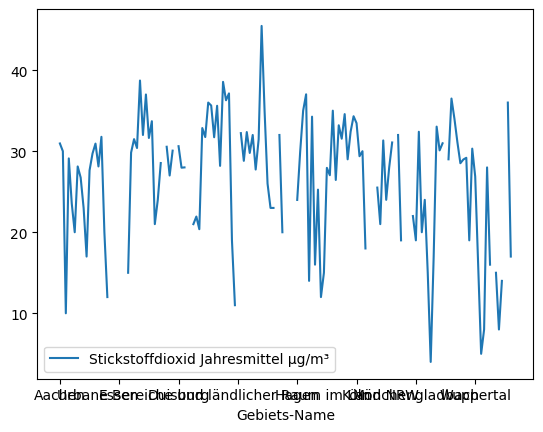

In [97]:
# Plot vehicles per Region
df3.plot(x='Gebiets-Name', y='Stickstoffdioxid Jahresmittel µg/m³')